In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Data Profile

In [2]:
import pandas as pd
A=pd.read_csv("C:/Users/Dell/Desktop/dk07/Cars93.csv")

In [3]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
A.tail()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240
92,93,Volvo,850,Midsize,24.8,26.7,28.5,20,28,Driver & Passenger,...,5,184,105,69,38,30.0,15.0,3245,non-USA,Volvo 850


In [5]:
A.shape

(93, 28)

In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [7]:
A.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

# Missing Data Treatment

In [8]:
from preprocessing_6pm import replacer
replacer(A)

In [9]:
A.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [10]:
B = A[["MPG.city","Price"]]

In [11]:
B.describe()

,MPG.city,Price
count,93.000000,93.000000
mean,22.365591,19.509677
std,5.619812,9.659430
min,15.000000,7.400000
25%,18.000000,12.200000
50%,21.000000,17.700000
75%,25.000000,23.300000
max,46.000000,61.900000


# Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
C = pd.DataFrame(ss.fit_transform(B),columns=B.columns)

# Elbow Curve to find best number of clusters

In [13]:
K = []
WCSS = []
from sklearn.cluster import KMeans
for i in range(1,20,1):
    km = KMeans(n_clusters=i)
    model = km.fit(C)
    K.append(i)
    WCSS.append(model.inertia_)

In [14]:
K

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [15]:
WCSS

[186.0,
 93.92806219538846,
 55.24519288386834,
 38.13325876059033,
 25.728822130776074,
 17.313281420603605,
 13.937266751712855,
 11.569527793997718,
 10.443772669603723,
 8.723667035735916,
 7.800940040866393,
 6.925204471104771,
 6.106084727639793,
 5.456095259919226,
 4.900725703311687,
 4.550777026783686,
 3.9233006318653723,
 3.6350513495366004,
 3.313811201518727]

([<matplotlib.axis.XTick at 0x22e60ea7a00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

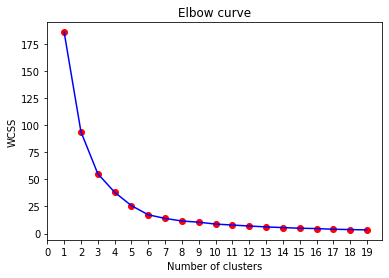

In [16]:
import matplotlib.pyplot as plt
plt.scatter(K,WCSS,c="red")
plt.plot(K,WCSS,c="blue")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow curve")
plt.xticks(range(0,20,1))

# Clustering

In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model = km.fit(C)
model.labels_

array([3, 2, 0, 2, 0, 3, 0, 0, 0, 2, 2, 3, 3, 0, 3, 0, 0, 0, 2, 0, 3, 0,
       1, 3, 3, 0, 3, 0, 1, 0, 1, 3, 3, 3, 3, 0, 0, 0, 1, 1, 3, 1, 3, 1,
       3, 3, 3, 2, 0, 2, 2, 2, 1, 1, 3, 0, 2, 2, 2, 3, 0, 1, 0, 1, 3, 0,
       0, 3, 3, 0, 0, 3, 1, 3, 0, 0, 0, 0, 1, 1, 3, 3, 1, 1, 3, 3, 0, 3,
       0, 0, 0, 0, 0])

# Plot these clusters

Text(0.5, 1.0, 'Price vs Mileage')

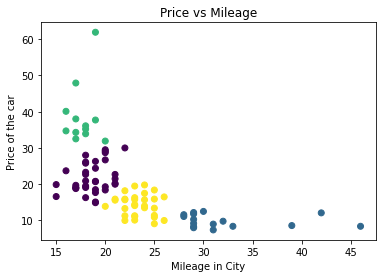

In [18]:
plt.scatter(B["MPG.city"],B["Price"],c=model.labels_)
plt.xlabel("Mileage in City")
plt.ylabel("Price of the car")
plt.title("Price vs Mileage")

In [19]:
model.cluster_centers_

array([[-0.65835347,  0.23839258],
       [ 1.74602039, -0.99828992],
       [-0.84066758,  1.99572644],
       [ 0.1731352 , -0.54399396]])

In [20]:
model.inertia_

38.06526065774016

In [21]:
Centers = ss.inverse_transform(model.cluster_centers_)
Q = pd.DataFrame(Centers,columns=["X","Y"])

In [22]:
Q

,X,Y
0,18.685714,21.800000
1,32.125000,9.918750
2,17.666667,38.683333
3,23.333333,14.283333


Text(0.5, 1.0, 'Price vs Mileage')

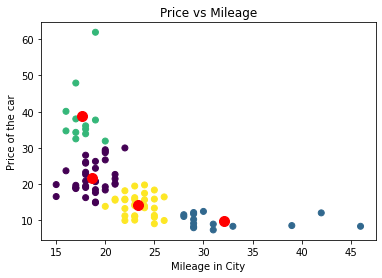

In [23]:
plt.scatter(B["MPG.city"],B["Price"],c=model.labels_)
plt.scatter(Q.X,Q.Y,s=100,c="red")
plt.xlabel("Mileage in City")
plt.ylabel("Price of the car")
plt.title("Price vs Mileage")

In [24]:
B["Clusters"]=model.labels_
B["Make"]=A.Make

In [25]:
B

,MPG.city,Price,Clusters,Make
0,25,15.9,3,Acura Integra
1,18,33.9,2,Acura Legend
2,20,29.1,0,Audi 90
3,19,37.7,2,Audi 100
4,22,30.0,0,BMW 535i
...,...,...,...,...
88,17,19.7,0,Volkswagen Eurovan
89,21,20.0,0,Volkswagen Passat
90,18,23.3,0,Volkswagen Corrado
91,21,22.7,0,Volvo 240


In [28]:
cm = input("Enter a car Make to see similar cars: ")

cluster_number_of_given_car = list(B[B.Make==cm].Clusters)[0]

W = list(B[B.Clusters == cluster_number_of_given_car].Make)
W.remove(cm)

print("Entered Car: ",cm)
print("Similar Cars: ",W)

Enter a car Make to see similar cars: BMW 535i
Entered Car:  BMW 535i
Similar Cars:  ['Audi 90', 'Buick LeSabre', 'Buick Roadmaster', 'Buick Riviera', 'Chevrolet Camaro', 'Chevrolet Lumina_APV', 'Chevrolet Astro', 'Chevrolet Caprice', 'Chrylser Concorde', 'Chrysler Imperial', 'Dodge Caravan', 'Dodge Stealth', 'Eagle Vision', 'Ford Aerostar', 'Ford Taurus', 'Ford Crown_Victoria', 'Lexus ES300', 'Mazda MPV', 'Mercury Cougar', 'Mitsubishi Diamante', 'Nissan Quest', 'Nissan Maxima', 'Oldsmobile Silhouette', 'Oldsmobile Eighty-Eight', 'Pontiac Firebird', 'Pontiac Grand_Prix', 'Pontiac Bonneville', 'Saab 900', 'Toyota Previa', 'Volkswagen Eurovan', 'Volkswagen Passat', 'Volkswagen Corrado', 'Volvo 240', 'Volvo 850']
